<a href="https://colab.research.google.com/github/expectnothin/asrkr-ml-py/blob/main/Shivz_Small_Language_Model_Scratch_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Let us build a Small Language Model (SLM) from scratch. We will try to keep the parameter size to 10-15 million.

Our goal is to generate creative and coherent text based on the input data.

## Step 1: Import the Dataset

TinyStories is a synthetic dataset of short stories that only contain words that a typical 3 to 4-year-olds usually understand, generated by GPT-3.5 and GPT-4. We can get it from HuggingFace.

In [ ]:
!pip install -U datasets

In [ ]:
# Removed redundant pip install

In [ ]:
import os

# List all files in the current directory
for f in os.listdir():
    print(f)

.config
test.bin
TinyStories
train.bin
sample_data


In [ ]:
from google.colab import files
files.download("/content/TinyStories/train.jsonl")

In [ ]:
!ls -lh /content/TinyStories

import json

input_file = "/content/TinyStories/TinyStories-train.txt"
output_file = "/content/TinyStories/train.jsonl"

with open(input_file, "r") as f_in, open(output_file, "w") as f_out:
    for line in f_in:
        f_out.write(json.dumps({"text": line.strip()}) + "\n")



In [ ]:
!pip install datasets --upgrade --quiet
from datasets import load_dataset
from datasets import Dataset
from datasets.utils.logging import disable_progress_bar
disable_progress_bar()

!head /content/TinyStories/train.jsonl

from datasets import Dataset
myds = Dataset.from_json("/content/TinyStories/train.jsonl")

myds = load_dataset("roneneldan/TinyStories", split="train")
print(myds)

# You can also print summary manually:
print(f"Type: {type(myds)}")
print(f"Number of rows: {len(myds)}")
print(f"Column names: {myds.column_names}")
print("First example:")


#print(myds[0])

{"text": "One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt."}
{"text": "Lily went to her mom and said, \"Mom, I found this needle. Can you share it with me and sew my shirt?\" Her mom smiled and said, \"Yes, Lily, we can share the needle and fix your shirt.\""}
{"text": "Together, they shared the needle and sewed the button on Lily's shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together."}
{"text": "<|endoftext|>"}
{"text": "Once upon a time, there was a little car named Beep. Beep loved to go fast and play in the sun. Beep was a healthy car because he always had good fuel. Good fuel made Beep happy and strong."}
{"text": "One day, Beep was driv

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Dataset({
    features: ['text'],
    num_rows: 2119719
})
Type: <class 'datasets.arrow_dataset.Dataset'>
Number of rows: 2119719
Column names: ['text']
First example:


In [ ]:
from datasets import DatasetDict

dataset = Dataset.from_json("/content/TinyStories/train.jsonl")
dataset = dataset.train_test_split(test_size=0.1)

# Step 3: Save to disk (folder format)
train_ds.save_to_disk("train_dataset")
test_ds.save_to_disk("test_dataset")

# Step 4: Archive to .bin format
shutil.make_archive("train_dataset", "zip", "train_dataset")
shutil.make_archive("test_dataset", "zip", "test_dataset")

# Step 5: Rename .zip to .bin
os.rename("train_dataset.zip", "train_dataset.bin")
os.rename("test_dataset.zip", "test_dataset.bin")

print(dataset)
print(dataset["train"][0])

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 13333941
    })
    test: Dataset({
        features: ['text'],
        num_rows: 1481549
    })
})


In [ ]:
from datasets import Dataset, load_from_disk
import shutil, os

# Step 1: Load from JSONL
dataset = Dataset.from_json("/content/TinyStories/train.jsonl")

# Step 2: Split into train and validation
split_dataset = dataset.train_test_split(test_size=0.1, seed=42)
train_ds = split_dataset["train"]
val_ds = split_dataset["test"]

# Step 3: Save to folders
train_ds.save_to_disk("train_dataset")
val_ds.save_to_disk("val_dataset")

# Step 4: Archive as .bin files (just zipped folders with .bin extension)
shutil.make_archive("train_dataset", "zip", "train_dataset")
shutil.make_archive("val_dataset", "zip", "val_dataset")

# Step 5: Rename .zip → .bin
os.rename("train_dataset.zip", "train_dataset.bin")
os.rename("val_dataset.zip", "val_dataset.bin")

print("✅ Saved as train_dataset.bin and val_dataset.bin")

✅ Saved as train_dataset.bin and val_dataset.bin


In [ ]:
!ls -lh /content/TinyStories/train.jsonl
!head /content/TinyStories/train.jsonl

In [ ]:
!apt-get install git-lfs
!git lfs install

%cd /content/
!git clone https://huggingface.co/datasets/roneneldan/TinyStories
%cd TinyStories
!git lfs pull

!ls -lh /content/TinyStories

from datasets import load_dataset
!rm -rf ~/.cache/huggingface/datasets
!rm -rf ~/.cache/huggingface/hub
!rm -rf ./tmp_dataset_cache

!ls -lh /content/TinyStories

# ds = load_dataset("roneneldan/TinyStories", download_mode="force_redownload")

## Step 2: Tokenize the Dataset

In this step, we will do the following:

(1) Tokenize the dataset into tokenIDs.

(2) Create a file called "train.bin" and "validtion.bin" where we will store the tokenIDs from the entire dataset.

(3) We make sure the tokenIDs are stored on a disk, rather than on the RAM for efficient computations.

In [ ]:
import os
os.rename("train_dataset.bin", "train_dataset.zip")
os.rename("val_dataset.bin", "val_dataset.zip")

import shutil
from datasets import load_from_disk, concatenate_datasets

shutil.unpack_archive("train_dataset.zip", "train_dataset")
shutil.unpack_archive("val_dataset.zip", "val_dataset")

train_ds = load_from_disk("train_dataset")
val_ds = load_from_disk("val_dataset")

# Reunite them (if you want full dataset back together)
full_ds = concatenate_datasets([train_ds, val_ds])





In [ ]:
def inspect_dataset(ds):
    from datasets import Dataset, DatasetDict

    if isinstance(ds, DatasetDict):
        print(f"📦 DatasetDict with {len(ds)} splits:\n")
        for split_name, split in ds.items():
            print(f"🔹 Split: {split_name}")
            print(f"   👉 Rows: {len(split)}")
            print(f"   👉 Columns: {split.column_names}")
            print(f"   👉 Example[0]: {split[0]}\n")

    elif isinstance(ds, Dataset):
        print(f"📦 Single Dataset:")
        print(f"   👉 Rows: {len(ds)}")
        print(f"   👉 Columns: {ds.column_names}")
        print(f"   👉 Example[0]: {ds[0]}")
    else:
        print("⚠️ Not a Hugging Face Dataset or DatasetDict.")

In [ ]:
inspect_dataset()split_ds

📦 DatasetDict with 2 splits:

🔹 Split: train
   👉 Rows: 1907747
   👉 Columns: ['text']
   👉 Example[0]: {'text': 'Anna and Ben went to the park with Mom. They liked to play on the swings and slide. They also liked to feed the ducks in the pond. Mom gave them some bread to share with the ducks.\n\nThey saw a big duck with a green head and a brown body. He looked hungry, so Anna threw him a piece of bread. But he did not eat it. He quacked loudly and chased the other ducks away. He wanted all the bread for himself.\n\n"Stop it, duck!" Ben said. "You are rude. You have to share with the others."\n\nThe duck did not listen. He kept quacking and biting the other ducks. He made them sad and scared. Anna and Ben felt sorry for them.\n\n"Mom, can we help the other ducks?" Anna asked.\n\nMom nodded. She took a stick and waved it at the rude duck. She said, "Shoo, shoo, go away. You are not nice. Leave the other ducks alone."\n\nThe rude duck saw the stick and got scared. He stopped quacking and

In [ ]:
full_ds.save_to_disk("full_dataset")

In [ ]:
import shutil, os

# Zip the folder
shutil.make_archive("full_dataset", "zip", "full_dataset")

# Rename to .bin if you prefer binary-style naming
os.rename("full_dataset.zip", "full_dataset.bin")

In [ ]:
!pip install tiktoken
import tiktoken
import os
import numpy as np
from tqdm.auto import tqdm

enc = tiktoken.get_encoding("gpt2")



# Some functions from https://github.com/karpathy/nanoGPT/blob/master/data/openwebtext/prepare.py

def process(example):
    ids = enc.encode_ordinary(example['text']) # encode_ordinary ignores any special tokens
    out = {'ids': ids, 'len': len(ids)}
    return out

if not os.path.exists("train.bin"):
    tokenized = split_ds.map(
        process,
        remove_columns=['text'],
        desc="tokenizing the splits",
        num_proc=8,
        )
    # concatenate all the ids in each dataset into one large file we can use for training
    for split, dset in tokenized.items():
        arr_len = np.sum(dset['len'], dtype=np.uint64)
        filename = f'{split}.bin'
        dtype = np.uint16 # (can do since enc.max_token_value == 50256 is < 2**16)
        arr = np.memmap(filename, dtype=dtype, mode='w+', shape=(arr_len,))
        total_batches = 1024

        idx = 0
        for batch_idx in tqdm(range(total_batches), desc=f'writing {filename}'):
            # Batch together samples for faster write
            batch = dset.shard(num_shards=total_batches, index=batch_idx, contiguous=True).with_format('numpy')
            arr_batch = np.concatenate(batch['ids'])
            # Write into mmap
            arr[idx : idx + len(arr_batch)] = arr_batch
            idx += len(arr_batch)
        arr.flush()

writing train.bin:   0%|          | 0/1024 [00:00<?, ?it/s]

writing test.bin:   0%|          | 0/1024 [00:00<?, ?it/s]

In [ ]:
from datasets import Dataset

split_ds = myds.train_test_split(test_size=0.1)

In [ ]:
from datasets import Dataset, DatasetDict
import random

# Load the giant dataset
full_dataset = Dataset.from_json("/content/TinyStories/train.jsonl")

# Set seed for reproducibility
random.seed(42)

# Shuffle and split
full_dataset = full_dataset.shuffle(seed=42)
split_datasets = full_dataset.train_test_split(test_size=0.05)

# Save them to disk if needed
split_datasets['train'].to_json("/content/TinyStories/train_split.jsonl")
split_datasets['test'].to_json("/content/TinyStories/val_split.jsonl")

# Wrap into DatasetDict
dataset = DatasetDict({
    "train": split_datasets['train'],
    "validation": split_datasets['test']
})

Creating json from Arrow format:   0%|          | 0/14075 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/741 [00:00<?, ?ba/s]

In [ ]:
!nvidia-smi

Wed Jul 23 15:19:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import nbformat
from google.colab import files

# Load the notebook
notebook_filename = "Copy of Vizuara AI Labs Small Language Model Scratch Final.ipynb"  # replace with your file name
with open(notebook_filename, "r") as f:
    nb = nbformat.read(f, as_version=4)

# Clean up metadata.widgets if broken
for cell in nb.cells:
    if 'metadata' in cell and 'widgets' in cell['metadata']:
        if 'state' not in cell['metadata']['widgets']:
            del cell['metadata']['widgets']

# Save cleaned notebook
fixed_filename = "fixed_" + notebook_filename
with open(fixed_filename, "w") as f:
    nbformat.write(nb, f)

# Download it (or push to GitHub manually)
files.download(fixed_filename)

FileNotFoundError: [Errno 2] No such file or directory: 'Copy of Vizuara AI Labs Small Language Model Scratch Final.ipynb'

## Step 3: Create Input-Output batches for the dataset

In [ ]:
# Some functions from https://github.com/karpathy/nanoGPT/blob/master/train.py with slight modifications
def get_batch(split):
    # We recreate np.memmap every batch to avoid a memory leak, as per
    # https://stackoverflow.com/questions/45132940/numpy-memmap-memory-usage-want-to-iterate-once/61472122#61472122
    if split == 'train':
        data = np.memmap('train.bin', dtype=np.uint16, mode='r')
    else:
        data = np.memmap('validation.bin', dtype=np.uint16, mode='r')
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([torch.from_numpy((data[i:i+block_size]).astype(np.int64)) for i in ix])
    y = torch.stack([torch.from_numpy((data[i+1:i+1+block_size]).astype(np.int64)) for i in ix])
    if device_type == 'cuda':
        # pin arrays x,y, which allows us to move them to GPU asynchronously (non_blocking=True)
        x, y = x.pin_memory().to(device, non_blocking=True), y.pin_memory().to(device, non_blocking=True)
    else:
        x, y = x.to(device), y.to(device)


        print("x sample:", x[0])        # First image tensor

    return x, y

    x, y = get_batch("train")






In [ ]:
# Define the function first
def get_batch(split):
    import numpy as np
    import torch

    block_size = 128
    batch_size = 4
    device = 'cpu'
    device_type = 'cpu'  # Change to 'cuda' if GPU

    print(f"\n🚀 get_batch called with split='{split}'")
    data_file = 'train.bin' if split == 'train' else 'validation.bin'

    try:
        data = np.memmap(data_file, dtype=np.uint16, mode='r')
        print(f"Loaded {data_file}, length: {len(data)}")
    except Exception as e:
        print(f"⚠️ Error loading memmap: {e}")
        return None, None

    if len(data) < block_size + 1:
        print(f"🚫 Not enough data in {data_file} to create a block of size {block_size}")
        return None, None

    ix = torch.randint(len(data) - block_size, (batch_size,))
    print(f"Sample indices: {ix[:5]}")

    try:
        x = torch.stack([torch.from_numpy((data[i:i+block_size]).astype(np.int64)) for i in ix])
        y = torch.stack([torch.from_numpy((data[i+1:i+1+block_size]).astype(np.int64)) for i in ix])
    except Exception as e:
        print(f"❌ Error stacking batches: {e}")
        return None, None

    if device_type == 'cuda':
        x, y = x.pin_memory().to(device, non_blocking=True), y.pin_memory().to(device, non_blocking=True)
    else:
        x, y = x.to(device), y.to(device)

    print("✅ Batch tensors created")
    print("x sample:", x[0][:10])
    print("y sample:", y[0][:10])
    return x, y

# CALL IT
x, y = get_batch("train")

# IF SUCCESSFUL, PRINT SHAPE
if x is not None:
    print("X shape:", x.shape)
    print("Y shape:", y.shape)

    !pip install tiktoken
import tiktoken
import os
import numpy as np
from tqdm.auto import tqdm

enc = tiktoken.get_encoding("gpt2")
def decode(token_list):
    return enc.decode(token_list)

# Removing the lines calling decode as the function is not defined and not essential for this step.
print("Decoded X[0]:", decode(x[0].tolist()))
print("Decoded Y[0]:", decode(y[0].tolist()))


🚀 get_batch called with split='train'
Loaded train.bin, length: 424691083
Sample indices: tensor([138892052,  29316256, 356103290, 407148769])
✅ Batch tensors created
x sample: tensor([30697,  1978,   329, 12607,    13,  1273,  2007,   318,   257,  3290])
y sample: tensor([ 1978,   329, 12607,    13,  1273,  2007,   318,   257,  3290,   508])
X shape: torch.Size([4, 128])
Y shape: torch.Size([4, 128])
Decoded X[0]: affle together for breakfast.Stitch is a dog who likes to mark his toys. He has a ball, a bone, a rope and a duck. He marks them with his teeth and his smell. He thinks they are his and no one can take them.

One day, a new dog comes to his house. His name is Spot. Spot is big and crazy. He likes to run and jump and bark. He sees Stitch's toys and wants to play with them. He does not know they are marked.

Stitch is angry when he sees Spot with his toys. He growls and runs to him
Decoded Y[0]:  together for breakfast.Stitch is a dog who likes to mark his toys. He has a ball

## Step 4: Define the SLM Model Architecture

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
from dataclasses import dataclass
import numpy as np
from tqdm.auto import tqdm
from contextlib import nullcontext
import os

class LayerNorm(nn.Module):
    def __init__(self, ndim, bias):
        super().__init__()
        self.weight = nn.Parameter(torch.ones(ndim))
        self.bias = nn.Parameter(torch.zeros(ndim)) if bias else None
    def forward(self, x):
        return F.layer_norm(x, self.weight.shape, self.weight, self.bias, 1e-5)

class CausalSelfAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        assert config.n_embd % config.n_head == 0
        self.c_attn = nn.Linear(config.n_embd, 3 * config.n_embd, bias=config.bias)
        self.c_proj = nn.Linear(config.n_embd, config.n_embd, bias=config.bias)
        self.attn_dropout = nn.Dropout(config.dropout)
        self.resid_dropout = nn.Dropout(config.dropout)
        self.n_head = config.n_head
        self.n_embd = config.n_embd
        self.flash = hasattr(F, 'scaled_dot_product_attention')
        if not self.flash:
            self.register_buffer("bias", torch.tril(torch.ones(config.block_size, config.block_size))
                                       .view(1, 1, config.block_size, config.block_size))

    def forward(self, x):
        B, T, C = x.size()
        q, k, v = self.c_attn(x).split(self.n_embd, dim=2)
        k = k.view(B, T, self.n_head, C // self.n_head).transpose(1, 2)
        q = q.view(B, T, self.n_head, C // self.n_head).transpose(1, 2)
        v = v.view(B, T, self.n_head, C // self.n_head).transpose(1, 2)

        if self.flash:
            y = F.scaled_dot_product_attention(q, k, v, attn_mask=None, dropout_p=self.attn_dropout.p if self.training else 0.0, is_causal=True)
        else:
            att = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(k.size(-1)))
            att = att.masked_fill(self.bias[:, :, :T, :T] == 0, float('-inf'))
            att = F.softmax(att, dim=-1)
            att = self.attn_dropout(att)
            y = att @ v

        y = y.transpose(1, 2).contiguous().view(B, T, C)
        y = self.resid_dropout(self.c_proj(y))
        return y

class MLP(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.c_fc = nn.Linear(config.n_embd, 4 * config.n_embd, bias=config.bias)
        self.gelu = nn.GELU()
        self.c_proj = nn.Linear(4 * config.n_embd, config.n_embd, bias=config.bias)
        self.dropout = nn.Dropout(config.dropout)
    def forward(self, x):
        return self.dropout(self.c_proj(self.gelu(self.c_fc(x))))

class Block(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.ln1 = LayerNorm(config.n_embd, config.bias)
        self.attn = CausalSelfAttention(config)
        self.ln2 = LayerNorm(config.n_embd, config.bias)
        self.mlp = MLP(config)
    def forward(self, x):
        x = x + self.attn(self.ln1(x))
        x = x + self.mlp(self.ln2(x))
        return x

@dataclass
class GPTConfig:
    block_size: int
    vocab_size: int
    n_layer: int
    n_head: int
    n_embd: int
    dropout: float = 0.0
    bias: bool = True

class GPT(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config
        self.transformer = nn.ModuleDict(dict(
            wte=nn.Embedding(config.vocab_size, config.n_embd),
            wpe=nn.Embedding(config.block_size, config.n_embd),
            drop=nn.Dropout(config.dropout),
            h=nn.ModuleList([Block(config) for _ in range(config.n_layer)]),
            ln_f=LayerNorm(config.n_embd, config.bias),
        ))
        self.lm_head = nn.Linear(config.n_embd, config.vocab_size, bias=False)
        self.transformer.wte.weight = self.lm_head.weight  # weight tying

        self.apply(self._init_weights)
        for pn, p in self.named_parameters():
            if pn.endswith('c_proj.weight'):
                nn.init.normal_(p, mean=0.0, std=0.02 / math.sqrt(2 * config.n_layer))

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):
        device = idx.device
        b, t = idx.size()
        assert t <= self.config.block_size
        pos = torch.arange(0, t, dtype=torch.long, device=device)

        tok_emb = self.transformer.wte(idx)
        pos_emb = self.transformer.wpe(pos)
        x = self.transformer.drop(tok_emb + pos_emb)
        for block in self.transformer.h:
            x = block(x)
        x = self.transformer.ln_f(x)

        if targets is not None:
            logits = self.lm_head(x)
            loss = F.cross_entropy(logits.view(-1, logits.size(-1)), targets.view(-1), ignore_index=-1)
            return logits, loss
        else:
            logits = self.lm_head(x[:, [-1], :])
            return logits, None

    @torch.no_grad()
    def generate(self, idx, max_new_tokens, temperature=1.0, top_k=None):
        """
        Generate tokens given a conditioning sequence.
        idx: Tensor of shape (B, T)
        """
        for _ in range(max_new_tokens):
            idx_cond = idx if idx.size(1) <= self.config.block_size else idx[:, -self.config.block_size:]
            logits, _ = self(idx_cond)
            logits = logits[:, -1, :] / temperature
            if top_k is not None:
                v, _ = torch.topk(logits, min(top_k, logits.size(-1)))
                logits[logits < v[:, [-1]]] = -float('Inf')
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx



In [ ]:
config = GPTConfig(
    vocab_size=50257,     # use the tokenizer's vocab size
    block_size=128,       # or whatever context size you're training with
    n_layer=6,
    n_head=6,
    n_embd=384,
    dropout=0.1,
    bias=True
)

model = GPT(config)

## Step 5: Define the loss function

In [ ]:
def estimate_loss(model):
    out = {}
    model.eval()
    with torch.inference_mode():
        for split in ['train', 'val']:
            losses = torch.zeros(eval_iters)
            for k in range(eval_iters):
                X, Y = get_batch(split)
                with ctx:
                    logits, loss = model(X, Y)
                losses[k] = loss.item()
            out[split] = losses.mean()
    model.train()
    return out

## Step 6: Define SLM Training Configuration Part 1

In [ ]:
# Training Config
import torch
from contextlib import nullcontext

learning_rate = 1e-4 #more stable training, earlier 1e-4
max_iters = 20000 #increase from 25000
warmup_steps = 1000 #smoother initial train, earlier 100
min_lr = 5e-4 #lower rate, earlier 5e-4
eval_iters = 500 # increased from 100
batch_size = 32 # changed from 16, better gradient estimate
block_size = 128 #changed from 64, capture longer range dependencies

gradient_accumulation_steps = 32 # reduced from 50

device =  "cuda" if torch.cuda.is_available() else "cpu"
device_type = 'cuda' if 'cuda' in device else 'cpu' # for later use in torch.autocast
# note: float16 data type will automatically use a GradScaler

# How to use autocast https://wandb.ai/wandb_fc/tips/reports/How-To-Use-Autocast-in-PyTorch--VmlldzoyMTk4NTky
#dtype = 'bfloat16' if torch.cuda.is_available() and torch.cuda.is_bf16_supported() else 'float16' # 'float32', 'bfloat16', or 'float16', the latter will auto implement a GradScaler
dtype = 'bfloat16' if torch.cuda.is_available() and torch.cuda.is_bf16_supported() else 'float16' # 'float32', 'bfloat16', or 'float16', the latter will auto implement a GradScaler
ptdtype = {'float32': torch.float32, 'bfloat16': torch.bfloat16, 'float16': torch.float16}[dtype]

ctx = nullcontext() if device_type == 'cpu' else torch.amp.autocast(device_type=device_type, dtype=ptdtype)

torch.set_default_device(device)
torch.manual_seed(42)

## Step 7: Define SLM Training Configuration Part 2

In [ ]:
from torch.optim.lr_scheduler import LinearLR,SequentialLR, CosineAnnealingLR

##PUT IN WEIGHT DECAY, CHANGED BETA2 to 0.95
optimizer =  torch.optim.AdamW(model.parameters(), lr=learning_rate, betas=(0.9, 0.95), weight_decay=0.1, eps=1e-9) #weight decay for regularization

scheduler_warmup = LinearLR(optimizer, total_iters = warmup_steps) #Implement linear warmup
scheduler_decay = CosineAnnealingLR(optimizer,T_max = max_iters - warmup_steps, eta_min = min_lr) #Implement lr decay
scheduler = SequentialLR(optimizer, schedulers=[scheduler_warmup, scheduler_decay], milestones=[warmup_steps]) #Switching from warmup to decay

# https://stackoverflow.com/questions/72534859/is-gradscaler-necessary-with-mixed-precision-training-with-pytorch
scaler = torch.cuda.amp.GradScaler(enabled=(dtype == 'float16'))

<ipython-input-9-a9032b47f003>:11: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(dtype == 'float16'))


## Step 8: Pre-train the SLM

In [ ]:
best_val_loss = float('inf')
best_model_params_path = "best_model_params.pt"
train_loss_list, validation_loss_list = [], []

# Ensure model is on the correct device
model = model.to(device)

# In your training loop
for epoch in tqdm(range(max_iters)):
    if epoch % eval_iters == 0 and epoch != 0:
        # Ensure estimate_loss uses the correct device
        losses = estimate_loss(model)
        print(f"Epoch {epoch}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
        print(f"The current learning rate: {optimizer.param_groups[0]['lr']:.5f}")
        train_loss_list += [losses['train']]
        validation_loss_list += [losses['val']]

        if losses['val'] < best_val_loss:
            best_val_loss = losses['val']
            torch.save(model.state_dict(), best_model_params_path)

    # Ensure X and y are on the correct device
    X, y = get_batch("train")
    X, y = X.to(device), y.to(device)

    with ctx:
        logits, loss = model(X, y)
        loss = loss / gradient_accumulation_steps
        scaler.scale(loss).backward()

    if ((epoch + 1) % gradient_accumulation_steps == 0) or (epoch + 1 == max_iters):
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
        scaler.step(optimizer)
        scaler.update()
        optimizer.zero_grad(set_to_none=True)
    scheduler.step()

  0%|          | 0/20000 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:227: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


Epoch 500: train loss 9.4897, val loss 9.4957
The current learning rate: 0.00007


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:243: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 1000: train loss 8.5043, val loss 8.5077
The current learning rate: 0.00010
Epoch 1500: train loss 7.5694, val loss 7.5678
The current learning rate: 0.00010
Epoch 2000: train loss 6.7185, val loss 6.7158
The current learning rate: 0.00010
Epoch 2500: train loss 6.0202, val loss 6.0208
The current learning rate: 0.00011
Epoch 3000: train loss 5.4947, val loss 5.4944
The current learning rate: 0.00011
Epoch 3500: train loss 5.0635, val loss 5.0636
The current learning rate: 0.00012
Epoch 4000: train loss 4.7260, val loss 4.7253
The current learning rate: 0.00012
Epoch 4500: train loss 4.4872, val loss 4.4745
The current learning rate: 0.00013
Epoch 5000: train loss 4.2713, val loss 4.2802
The current learning rate: 0.00014
Epoch 5500: train loss 4.0990, val loss 4.0995
The current learning rate: 0.00015
Epoch 6000: train loss 3.9773, val loss 3.9743
The current learning rate: 0.00016
Epoch 6500: train loss 3.8234, val loss 3.8265
The current learning rate: 0.00018
Epoch 7000: trai

## Step 9: Plot the SLM Loss Function

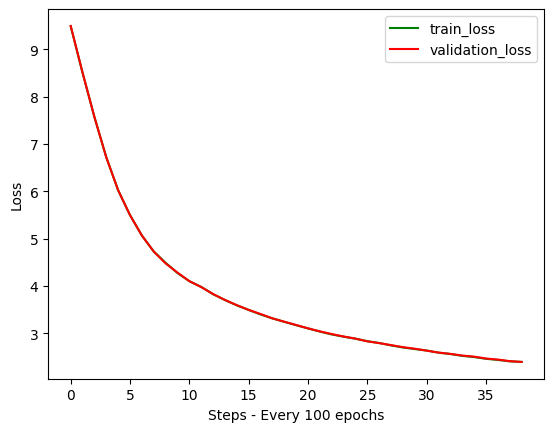

In [ ]:
import matplotlib.pyplot as plt
train_loss_list_converted = [i.cpu().detach() for i in train_loss_list]
validation_loss_list_converted = [i.cpu().detach() for i in validation_loss_list]

plt.plot(train_loss_list_converted, 'g', label='train_loss')
plt.plot(validation_loss_list_converted, 'r', label='validation_loss')
plt.xlabel("Steps - Every 100 epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



## Step 10: Run SLM Inference on our trained model

In [ ]:
#Load the model
model = GPT(config)  # re-create the model with same config
device =  "cuda" if torch.cuda.is_available() else "cpu"
best_model_params_path = "best_model_params.pt"
model.load_state_dict(torch.load(best_model_params_path, map_location=torch.device(device))) # load best model states


<All keys matched successfully>

In [ ]:
sentence = "Once upon a time there was a pumpkin."
context = (torch.tensor(enc.encode_ordinary(sentence)).unsqueeze(dim = 0))
y = model.generate(context, 200)
print(enc.decode(y.squeeze().tolist()))

Once upon a time there was a pumpkin. It was very special. The pumpkin were very happy.

One day, a kind lady came to the store to you. The delicious corn helped the bird play games alone. She had 2 laser soldiers who lived in the forest.

The lady felt ashamed. Her friend said, "Don't worry, I need a board!"

The witch said, "I found it under the garden. TheyIt's important to help others and Dad do it. We need to be careful and be careful." The lady smiled and felt happy on herself. 

 endAlright, the smell of the beautiful water, but it will take the more dimroom in the water.Once upon a time there was a little girl named Lily. She had a smelly coat with something very loud. One day, she knew she needed to explore more. It was a very special kind of him. 

Later that day, Lily went to the park and they saw many beautiful flowers she wanted


In [ ]:
sentence = "A little girl went to the woods"
context = (torch.tensor(enc.encode_ordinary(sentence)).unsqueeze(dim = 0))
y = model.generate(context, 200)
print(enc.decode(y.squeeze().tolist()))

A little girl went to the woods and she found a basket for her. In one he enjoyed the great basket and the tasty treats tall. Then, she decided to go home and the picnic.

As they walked, the little girl was getting tired and didn't want to drink. She opened her pocket to her room and got out. She was would open their new diary! She had a shower and a hug, so she pulled out a big, feeling warm and warm. She hope even when it was time to eat from the fun to eat!Once upon a time there was a little girl named Abbie. Benny loved to know what powers. Her father argued and walked for a after her. 

When he got there, Katie got excited and started to feel very tired. She said please to the hospital but sometimes he didn't have enough dessert. He sighed and decided to go home.

Bubbles was so happy and didn't like Freddy. He stayed away from the doctor and kept walking.


In [ ]:
from google.colab import runtime
runtime.unassign()